In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import gaussian_kde


In [3]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv"

df1= pd.read_csv(url)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

In [7]:
df1.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [8]:
df1.describe()

,edition,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,106.000000,106.000000,98.000000,98.000000,106.000000,106.000000,66.000000,67.000000,106.000000
mean,53.500000,4212.064151,125.754983,0.267727,2.735849,10.792453,1.778788,69.253731,27.716981
std,30.743563,704.284160,41.559391,0.476194,1.842885,5.307169,0.056989,6.592795,3.354470
min,1.000000,2428.000000,82.086667,0.002222,0.000000,1.000000,1.610000,52.000000,19.000000
25%,27.250000,3657.875000,92.601597,0.050833,1.000000,6.250000,1.740000,64.500000,26.000000
50%,53.500000,4155.500000,115.026806,0.101667,2.000000,12.000000,1.770000,69.000000,28.000000
75%,79.750000,4652.500000,142.678472,0.249931,4.000000,14.000000,1.820000,74.000000,30.000000
max,106.000000,5745.000000,238.740278,2.989167,8.000000,22.000000,1.900000,88.000000,36.000000


1.The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier



In [21]:
#convert time overal column to hours
df1['time_overall'] = pd.to_timedelta(df1['time_overall'], unit='h')
df1['time_hours'] = df1['time_overall'].dt.total_seconds() / 3600


In [16]:
#convert time_margin to minutes
df1['time_margin']= pd.to_timedelta(df1['time_margin'],unit='m')

In [13]:
df1['edition'].nunique()

106

In [22]:
df1.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,time_hours
0,1,1903-07-01,Maurice Garin,La Française,2428.0,3 days 22:33:14,0 days 00:02:59.350000002,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France,94.553889
1,2,1904-07-02,Henri Cornet,Conte,2428.0,4 days 00:05:54.999999999,0 days 00:02:16.233333336,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France,96.098611
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaT,NaT,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,NaN
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaT,NaT,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France,NaN
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaT,NaT,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,NaN


In [20]:
df1.columns


Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'died', 'full_name', 'nickname', 'birth_town',
       'birth_country', 'nationality'],
      dtype='object')

Text(0, 0.5, 'time_margin')

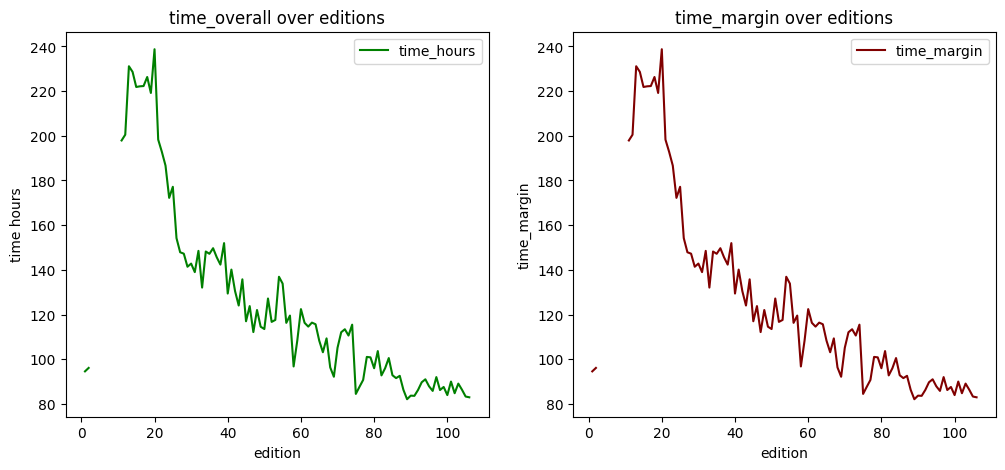

In [23]:
#plot a trend to see faster cyclist
fig,ax = plt.subplots(1,2,figsize=(12,5))

x=df1['edition']
y=df1['time_hours']
z=df1['time_margin']
ax[0].plot(x,y,color='green', label= 'time_hours')
ax[1].plot(x,y,color='maroon', label= 'time_margin')

ax[0].legend()
ax[1].legend()
ax[0].set_title('time_overall over editions')
ax[1].set_title('time_margin over editions')
ax[0].set_xlabel('edition')
ax[1].set_xlabel('edition')
ax[0].set_ylabel('time hours')
ax[1].set_ylabel('time_margin')


A box plot of the winners per stage type and comment sth. Use this image as inspiration

In [41]:
df1.columns


Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'died', 'full_name', 'nickname', 'birth_town',
       'birth_country', 'nationality', 'time_hours'],
      dtype='object')

C:\Users\dorice asami\AppData\Local\Temp\ipykernel_32872\3999924644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, y="time_hours", x="stage_wins", palette="Set3",vert= False)
C:\Users\dorice asami\AppData\Local\Temp\ipykernel_32872\3999924644.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


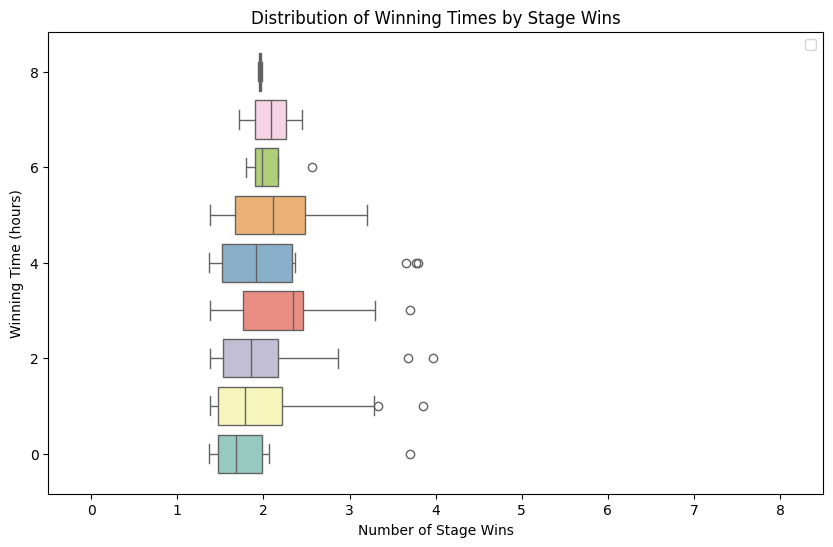

In [58]:
#no culumn for stage type seen
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, y="time_hours", x="stage_wins", palette="Set3",vert= False)
plt.legend()
plt.title("Distribution of Winning Times by Stage Wins")
plt.xlabel("Number of Stage Wins")
plt.ylabel("Winning Time (hours)")
plt.show()

What relationship is there between a winners age and the number of stages led.

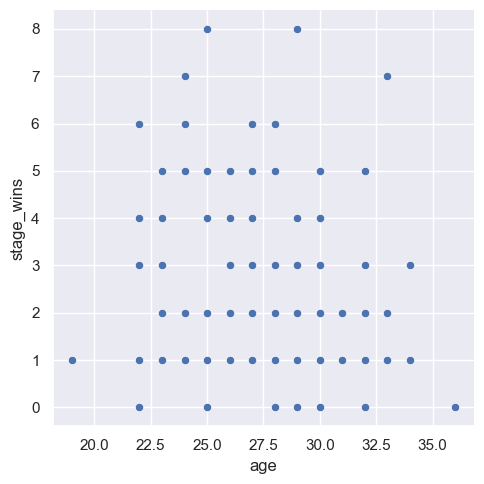

In [62]:
sns.set_theme(style="darkgrid")
sns.relplot(data=df1, x="age", y="stage_wins")


In [70]:
 #check relationship between age and stage wins

correlation = df1["age"].corr(df1["stage_wins"])
print("Correlation between age and stage wins:", correlation)

Correlation between age and stage wins: -0.16318678058631836


there is a relationship between age and stage wins
older winners tend to win more stages while younger winners dominate in stage wins

Sort by the most recent winning and find the winner's nationality and display the top. Use this image as inspiration

In [31]:
order=df1.sort_values(by ='edition',ascending=False)

recent_winner=order.iloc[0]

print(recent_winner[[ 'edition','winner_name','nationality']])

edition                106
winner_name    Egan Bernal
nationality       Colombia
Name: 105, dtype: object


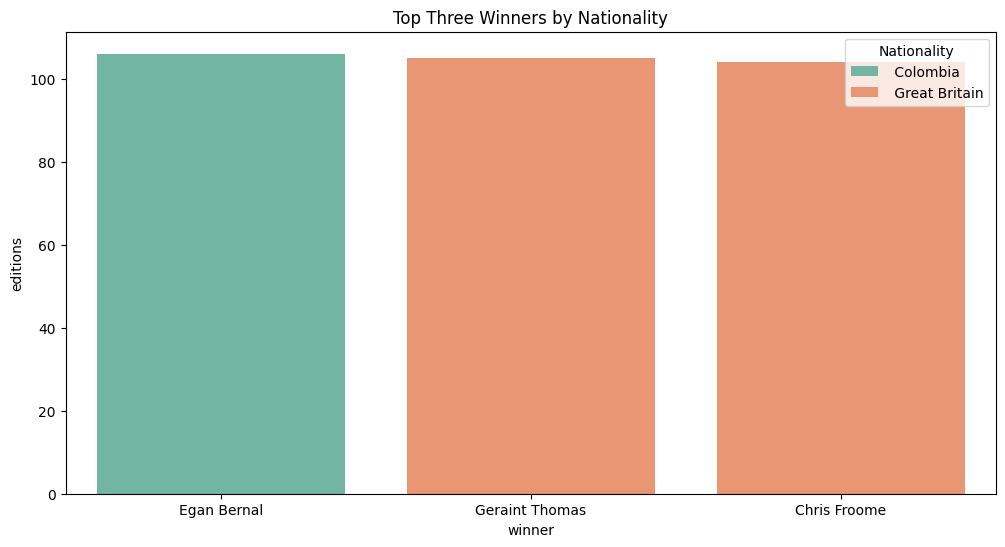

In [42]:
plt.figure(figsize=(12,6))

sns.barplot(data=order.head(3), 
            x="winner_name", 
            y="edition", 
            hue="nationality", 
            dodge=False, palette="Set2")

plt.title("Top Three Winners by Nationality")
plt.xlabel("winner")
plt.ylabel("editions")
plt.legend(title="Nationality")
plt.show()